In [69]:
#necessary imports

from astropy.io import ascii #importing datasets
from astropy import units as u
import astropy.coordinates as coord
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

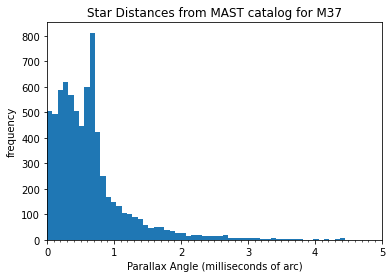

In [70]:

#number crunching to check if the distances check out. 
data = ascii.read("Gaia_DR2_messier_37.csv")


#there are 9000 entries let's hope my computer doesn't die. 
p = data["parallax"]

#this line takes a looonng time to run, like 20 seconds. When I optimize the program I will rewrite the calculations part in Rust.
#parallax = 1 / np.abs(p) * 1000
#print("Finished! Plotting")

fig, ax = plt.subplots()

ax.hist(np.abs(p), bins=100)
ax.set_xlabel("Parallax Angle (milliseconds of arc)")
ax.set_ylabel("frequency")

ax.set_xlim(0,5)

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

plt.title("Star Distances from MAST catalog for M37")
plt.show()

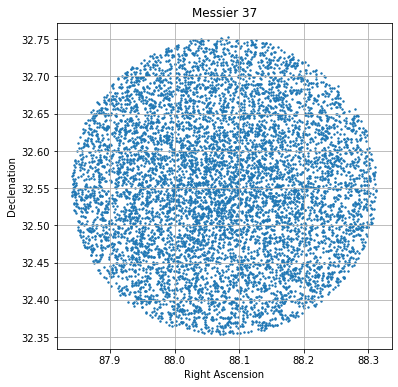

In [71]:

ra = data["ra"]
dec = data["dec"]

star_coords = coord.SkyCoord(ra, dec, unit=(u.deg, u.deg), frame='icrs')

plt.figure(figsize=(6, 6))

plt.grid()



plt.title("Messier 37")
plt.xlabel("Right Ascension")
plt.ylabel("Declenation")
plt.scatter(star_coords.ra, star_coords.dec, s=2)

#now we plot!
